# Sea level prediction

![separator](img/sep.jpeg)

In this project, we anaylize a dataset of the global average sea level change since 1880 in order to predict the sea level change through the year 2050.

We use `pandas`, `matplotlib` and `Scipy`:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

We proceed as follows:

## 1) Read data:

In [3]:
df = pd.read_csv('files/epa-sea-level.csv', na_values = ['?'])

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

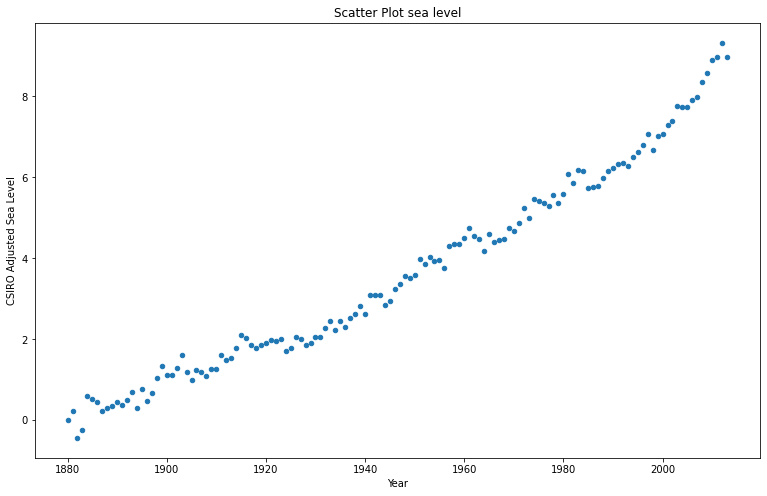

In [4]:
fig1, ax1 = plt.subplots(figsize=(13,8))
df.plot.scatter(
    title = 'Scatter Plot sea level',
    x = 'Year',
    y = 'CSIRO Adjusted Sea Level',
    legend = True,
    ax=ax1
    )

plt.show(fig1)

As we see, the data is a bit scattered. We will use *linear regression* to find the most fitting model to our prediction. The goal is basically ti find the linear model $y = ax+b $ that fits the most i.e. with the minimum possible loss. For that we use the **least squares regression** which calculates 
* the slope, given by the equation:
$$ a = \frac{ N \sum xy - \sum x \sum y}{N \sum x^2 - \left( \sum x \right)^2 } $$

* the y-intercept, given by the equation:
$$ b = \frac{ \sum y - a \sum x}{N} $$

We use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit:

In [5]:
X = df['Year']
Y = df['CSIRO Adjusted Sea Level']
model = linregress(X, Y)

(a, b) = (model.slope, model.intercept)

And we calculate the coordinates of the line of best fit:

In [9]:
X_1 = list(range(1880, 2050)) 
Y_1 = [ a * x + b for x in X_1 ]

We plot the line of best fit over the scatter plot making pass through our desired sea level prediction (i.e. x = 2050)

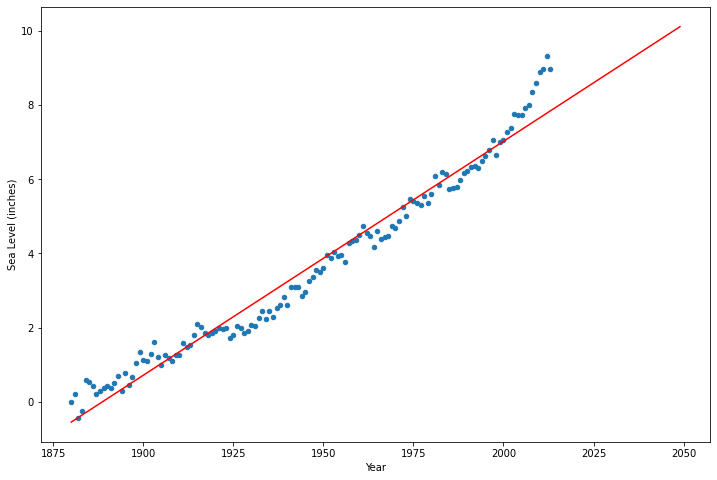

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

df.plot.scatter(
    x = 'Year',
    y = 'CSIRO Adjusted Sea Level',
    legend = True,
    ax=ax
    )
plt.plot(X_1, Y_1, color='red')
plt.ylabel('Sea Level (inches)')

plt.show(fig)

## 2) Comparison of sea rise rate:

Now we want to plot a new line of best fit sing only the data from year 2000:

In [18]:
mask = (df['Year'] >= 2000)
X_rec = df[mask]['Year']
Y_rec = df[mask]['CSIRO Adjusted Sea Level']
model_rec = linregress(X_rec, Y_rec)

(a_rec, b_rec) = (model_rec.slope, model_rec.intercept)

and still make it pass by 2050 to see if the rate of rise continues as it has since 2000:

In [19]:
X_2 = list(range(2000, 2050)) 
Y_2 = [ a_rec * x + b_rec for x in X_2]

We can then observe the difference, and how the rate of sea rise went up: 

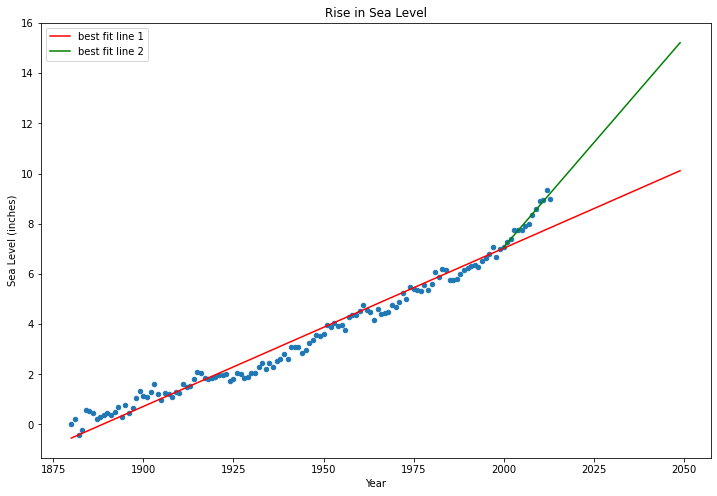

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

df.plot.scatter(
    x = 'Year',
    y = 'CSIRO Adjusted Sea Level',
    title='Rise in Sea Level',
    ax=ax
    )
plt.plot(X_1, Y_1, color='red', label='best fit line 1')
plt.plot(X_2, Y_2, color='green', label = 'best fit line 2')

plt.ylabel('Sea Level (inches)')
plt.legend()
plt.show(fig)

It suggests that the level of the sea in 2050 will approximate the value of:

In [21]:
print('{:.2f} inch ~ {:.2f} cm'.format(Y_2[-1], Y_2[-1] * 2.54) )

15.22 inch ~ 38.65 cm


In [ ]:
def draw_plot():
    # Read data from file


    # Create scatter plot


    # Create first line of best fit


    # Create second line of best fit


    # Add labels and title

    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()